# **Dataset: Student Performance**

# **Objective:**

Apply Multiple Linear Regression Model on Student Performance dataset and train the model on the dataset to finally predict results on testing data.


**Task**

Our task is to:


*   Preprocess the data, which includes feature scaling, outlier detection and treatment, checking normality of residuals, and  visualizing the data (use libraries i.e., matplotlib and seaborn).
*   Model the data using a multiple linear regression model.




# **Table of Contents**



1. **Data Preprocessing**

 1.1 Importing Libraries
 - Cell 1: Importing necessary libraries
 - Cell 2: Importing warnings
 - Cell 3: File upload
 1.2 Understanding the Dataset
 - Cell 4: Displaying the first few rows of the dataset
 - Cell 5: Checking dataset shape
 - Cell 6: Examining datatypes in each column
 - Cell 7: Basic data information
 - Cell 8: Summary statistics
 1.3 Handling Duplicate and Missing Values
 - Cell 9: Checking for duplicate rows
 - Cell 10: Encoding categorical feature 'Extracurricular Activities'
 - Cell 11: Counting rows
 - Cell 12: Checking for null values
 - Cell 13: Counting nulls per column
 - Cell 14: Dropping nulls
 - Cell 15: Heatmap to visualize any missing data
 1.4 Target Variable and Feature Distribution
 - Cell 16: Distribution plot for 'Performance Index'
 1.5 Correlation Analysis and Variance Inflation Factor (VIF)
 - Cell 17: Correlation matrix plot
 - Cell 18: Calculating VIF for each numerical feature

2. **Exploratory Data Analysis (EDA) with Visualizations**

 2.1 Distribution and Scatter Plots
 - Cell 19: Scatter plot of 'Hours Studied' vs. 'Performance Index'
 - Cell 19: Scatter plot of 'Previous Scores' vs. 'Performance Index'
 2.2 Outlier Detection
 - Cell 20: Boxplot for outliers in 'Performance Index'
 2.3 Count Plot
 - Cell 21: Count plot for 'Extracurricular Activities'
3. **Linear Regression Model**

 3.1 Model Setup and Feature Selection
 - Cell 22: Statistical model setup and summary
 - Cell 23: Dropping dependent variable from independent variables
 3.2 Data Preparation for Regression
 - Cell 24-25: Shaping X (features) and y (target)
 - Cell 26: Splitting data into training and testing sets
 3.3 Model Training and Prediction
 - Cell 27-28: Training X and y
 - Cell 29-30: Testing X and y
 - Cell 31: Calling and fitting linear regression model
 - Cell 32: Testing the model
 3.4 Model Evaluation and Residual Analysis
 - Cell 33: Scatter plot of actual vs. predicted data points
 - Cell 34: Comparing actual and predicted values
 - Cell 35: Calculating residuals
 - Cell 36: Residual plot by order of observations
 - Cell 37: Residual plot vs. fitted values
 - Cell 38: Histogram and Q-Q plots of residuals for normality check
 3.5 Model Performance Metrics
 - Cell 39: Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
 - Cell 40: Model evaluation with R-squared and RMSE



## **About the Dataset:**

The Student Performance Dataset explores factors affecting student achievement, covering 10,000 records with various predictors and a performance index:

- Hours Studied: Total hours each student studied.
- Previous Scores: Past test scores of students.
- Extracurricular Activities: Indicates if the student is involved in extracurriculars (Yes/No).
- Sleep Hours: Average daily sleep hours.
- Sample Question Papers Practiced: Number of sample papers practiced by each student.
- Performance Index: Overall academic performance, ranging from 10 to 100, with higher scores indicating better results.

# **Data Preprocessing**

In [5]:
# Cell 1.  Import all the necessary libraries

from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Load the CSV file into a DataFrame
file_name = next(iter(uploaded))  # Get the uploaded file's name
df = pd.read_csv(file_name)

Saving Student_Performance.csv to Student_Performance (2).csv


In [8]:
# Step 3: Display the first few rows of the DataFrame
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
df.shape


(10000, 6)

In [10]:

df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [13]:
duplicate_rows_in_data =df[df.duplicated()]
print("No. of Duplicate rows", duplicate_rows_in_data.shape)
duplicate_rows_in_data

No. of Duplicate rows (127, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [14]:
# Convert categorical column 'Extracurricular Activities' into numeric (1 for Yes, 0 for No)
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


**Point of attention 01: Dummy variable trap**


* Our categorical column has just two values (1 and 0), it's already in a form that a model can handle without any issues.
* Hence, we don't need to apply drop_first=True because there are no multiple dummy variables that could cause multicollinearity.

**Point of attention 02: Dropping duplicate rows**



In [15]:
df.count()

,0
Hours Studied,10000
Previous Scores,10000
Extracurricular Activities,10000
Sleep Hours,10000
Sample Question Papers Practiced,10000
Performance Index,10000


In [16]:
df.isnull()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [17]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [18]:
# we should drop missing values if any, it would drop all row if found any missing value
df=df.dropna()

df.count()

,0
Hours Studied,10000
Previous Scores,10000
Extracurricular Activities,10000
Sleep Hours,10000
Sample Question Papers Practiced,10000
Performance Index,10000


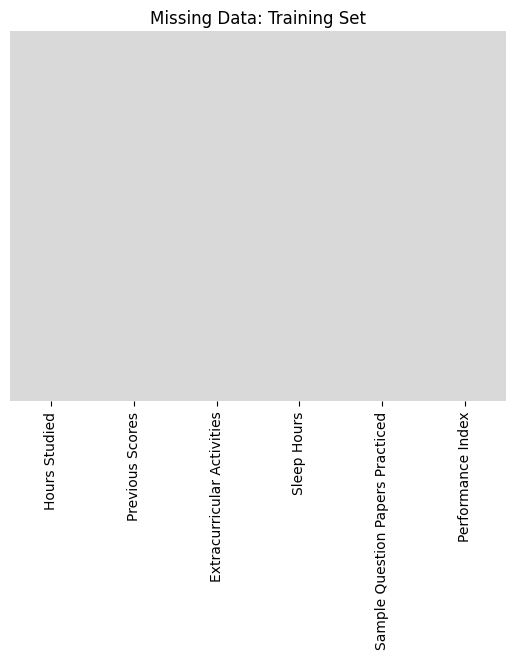

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

It means there are no missing values in the dataset

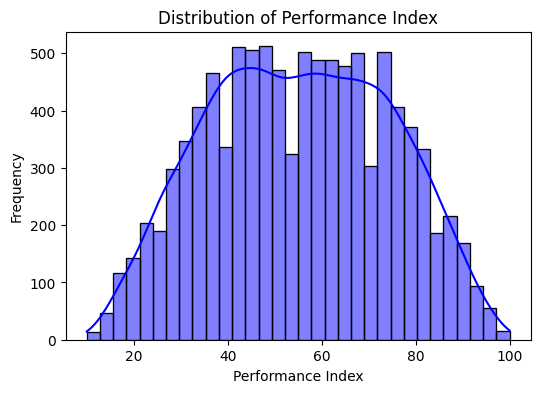

In [20]:
# Plot the distribution of the target variable 'Performance Index'
plt.figure(figsize=(6, 4))
sns.histplot(df['Performance Index'], kde=True, color='blue')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

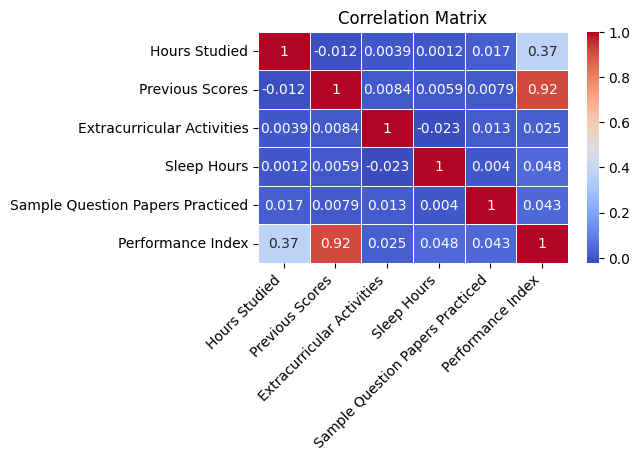

In [21]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your dataframe with the independent variables

# Select only numerical features for VIF calculation
numerical_df = df.select_dtypes(include=['number'])

# Add a constant to the model
X = add_constant(numerical_df)

# Create a dataframe to store VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns
# Calculate VIF for each numerical feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                            Feature         VIF
0                             const  318.619590
1                     Hours Studied   14.144641
2                   Previous Scores   76.143436
3        Extracurricular Activities    1.023421
4                       Sleep Hours    1.160572
5  Sample Question Papers Practiced    1.074935
6                 Performance Index   88.907321


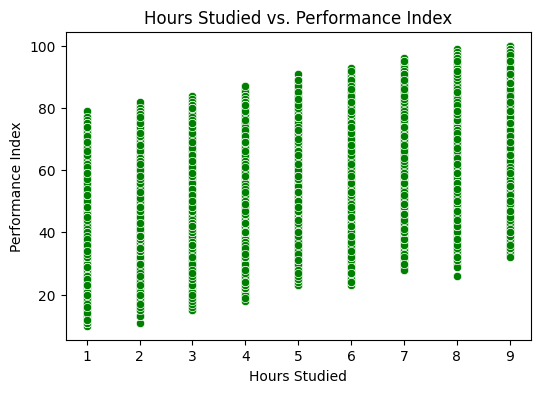

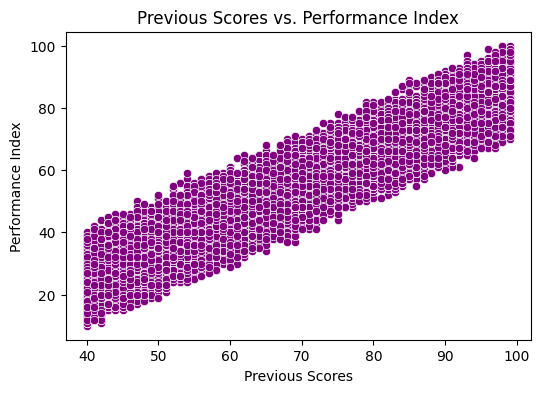

In [23]:
# Scatter plot between 'Hours Studied' and 'Performance Index'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df, color='green')
plt.title('Hours Studied vs. Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

# Scatter plot between 'Previous Scores' and 'Performance Index'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, color='purple')
plt.title('Previous Scores vs. Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

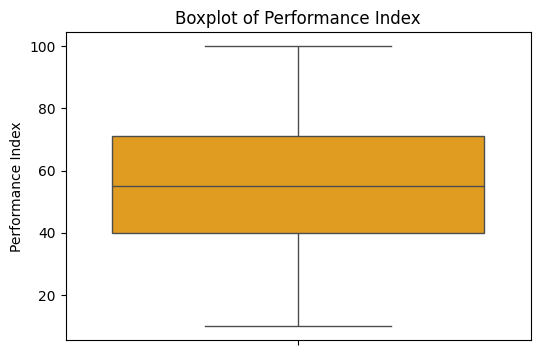

In [24]:
# Boxplot for detecting outliers in 'Performance Index'
plt.figure(figsize=(6, 4))
sns.boxplot(y='Performance Index', data=df, color='orange')
plt.title('Boxplot of Performance Index')
plt.ylabel('Performance Index')
plt.show()


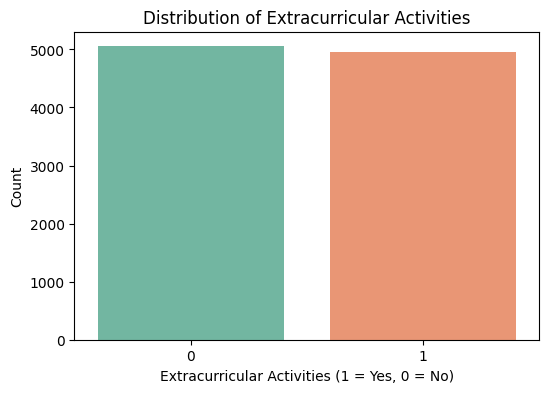

In [25]:
# Count plot for 'Extracurricular Activities' to check the distribution of students involved in activities
plt.figure(figsize=(6, 4))
sns.countplot(x='Extracurricular Activities', data=df, palette='Set2')
plt.title('Distribution of Extracurricular Activities')
plt.xlabel('Extracurricular Activities (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

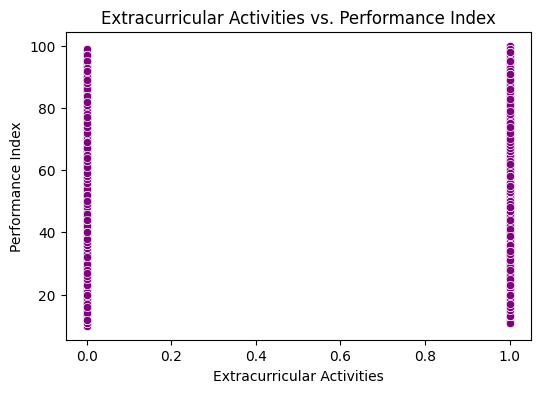

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Extracurricular Activities', y='Performance Index', data=df, color='purple')
plt.title('Extracurricular Activities vs. Performance Index')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

In [27]:
import statsmodels.api as sm

# Define the independent variables (your features)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

# Dependent variable (target)
y = df['Performance Index']

# Add constant (for intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:52:13   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [28]:

# Drop 'Performance Index' from df to create x
x = df.drop('Performance Index', axis=1)

# Assign 'Performance Index' to y
y = df['Performance Index']

In [29]:
x.shape

(10000, 5)

In [30]:
y.shape

(10000,)

In [31]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [32]:
x_train.shape
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6861,3,67,1,5,1
9881,1,78,0,8,8
4536,9,98,0,7,6
8430,5,65,0,8,4
6765,9,44,1,4,8
...,...,...,...,...,...
599,9,53,0,4,2
5695,4,92,1,8,2
8006,9,40,1,9,5
1361,7,51,0,8,2


In [33]:
y_train

,Performance Index
6861,45.0
9881,52.0
4536,97.0
8430,52.0
6765,39.0
...,...
599,47.0
5695,77.0
8006,40.0
1361,42.0


In [34]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6676,7,55,0,4,3
6421,9,98,1,7,4
9834,1,57,1,6,1
8492,3,71,0,5,3
9982,8,51,0,5,1
...,...,...,...,...,...
4441,1,65,1,6,7
4166,1,65,1,4,6
2567,4,62,0,9,6
8527,9,64,0,4,5


In [35]:
y_test

,Performance Index
6676,43.0
6421,95.0
9834,29.0
8492,48.0
9982,44.0
...,...
4441,38.0
4166,42.0
2567,46.0
8527,61.0


In [36]:
linear_reg =LinearRegression()

linear_reg.fit(x_train,y_train)

LinearRegression()

### **Model Testing**

In [37]:
y_pred=linear_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(2000,)
[44.38891422 96.15853705 30.52422606 ... 45.9649391  59.64558417
 16.80314704]


<function matplotlib.pyplot.show(close=None, block=None)>

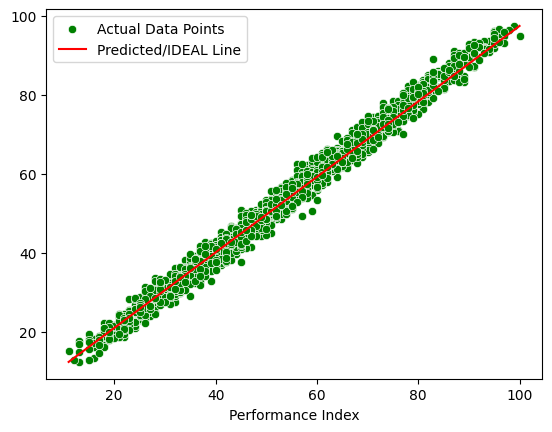

In [38]:
sns.scatterplot(x=y_test,y=y_pred,color='green',label='Actual Data Points')
sns.lineplot(x=[min(y_test),max(y_test)],y=[min(y_pred),max(y_pred)] , color='red',label='Predicted/IDEAL Line')
plt.legend()
plt.show

In [39]:
#combine actual and predicted values

results=np.column_stack([y_test,y_pred])
print('Actual Values  |    Predicted Values')
print('____________________________________')

for actual,predicted in results:
  print(f'{actual:15.2f}  |  {predicted:15.2f}')

Actual Values  |    Predicted Values
____________________________________
          43.00  |            44.39
          95.00  |            96.16
          29.00  |            30.52
          48.00  |            49.75
          44.00  |            43.27
          40.00  |            40.27
          78.00  |            78.10
          64.00  |            62.02
          53.00  |            48.56
          56.00  |            54.07
          74.00  |            76.05
          39.00  |            41.62
          44.00  |            44.44
          45.00  |            47.60
          59.00  |            57.81
          78.00  |            78.60
          65.00  |            64.22
          48.00  |            51.03
          41.00  |            39.99
          45.00  |            41.62
          76.00  |            73.46
          34.00  |            35.79
          27.00  |            24.17
          81.00  |            79.96
          78.00  |            77.73
          64.00  |        

In [40]:
residual=actual-y_pred
print(residual)

[-27.38891422 -79.15853705 -13.52422606 ... -28.9649391  -42.64558417
   0.19685296]


In [41]:
residuals=y_test-y_pred
print(residuals)

6676   -1.388914
6421   -1.158537
9834   -1.524226
8492   -1.753635
9982    0.733113
          ...   
4441   -1.831838
4166    3.332343
2567    0.035061
8527    1.354416
406     0.196853
Name: Performance Index, Length: 2000, dtype: float64


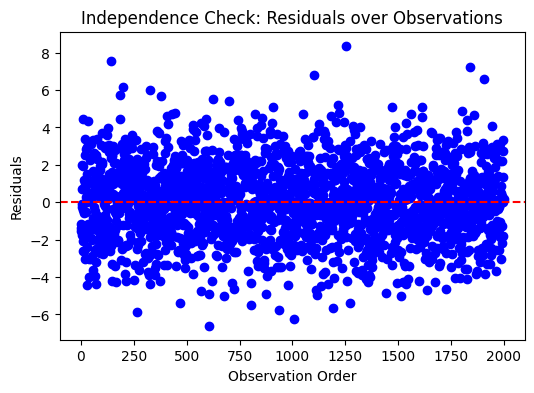

In [42]:
# Plot residuals over the order of observations to check independence
plt.figure(figsize=(6, 4))
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence Check: Residuals over Observations')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()

Yes, it is independent


Independent --> yes

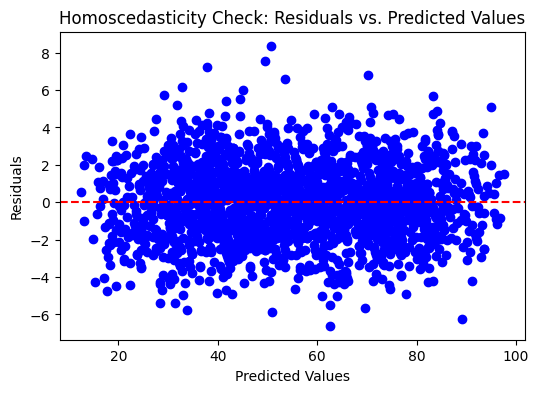

In [43]:
# Plot residuals vs. fitted values to check homoscedasticity
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

It is Homoscedastic

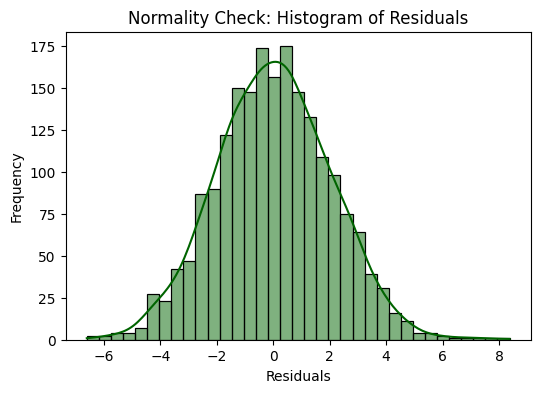

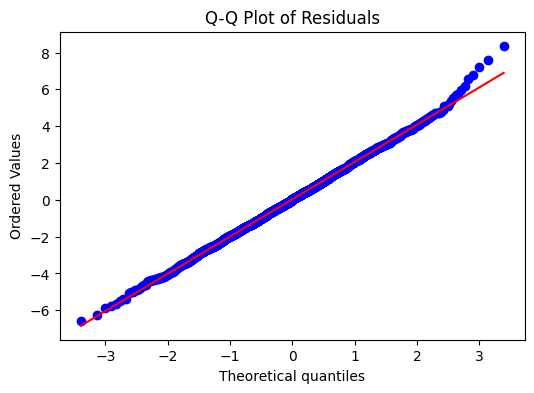

In [44]:
# Histogram of residuals to check normality
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='darkgreen')
plt.title('Normality Check: Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot to further check for normality
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()

It is almost a normal chart both in prediction and actual dataset.

### **Model Evaluation**

In [45]:
from sklearn.metrics import mean_squared_error

print("Linear Regression Model")
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

Linear Regression Model
MSE:  4.091042932500655
RMSE:  2.0226326736460716


In [46]:
# Evaluating the model using R-squared and RMSE
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.988914149928427


Model is 98.8% expressible by the independent varabiales we have taken.

Model is quite Expressible.

In [48]:
print('Coefficients: ', model.params)


Coefficients:  const                              -34.075588
Hours Studied                        2.852982
Previous Scores                      1.018434
Extracurricular Activities           0.612898
Sleep Hours                          0.480560
Sample Question Papers Practiced     0.193802
dtype: float64


In [50]:
print("R-squared: ", model.rsquared)


R-squared:  0.9887523323780958


# **Questions**

1. What role do the coefficients (slopes) play in Linear Regression? How would you interpret them in the context of our dataset?

2. What are the independent (predictor) and dependent (target) variables in this dataset?

3. What happens when we increase the number of features (independent variables) in a Linear Regression model? How does it affect accuracy?

4. What does the output summary of the model tell us about the statistical significance of each feature?

5. If we observe that the model has high training accuracy but low testing accuracy, what does that indicate?

1. Question 1 Answer:

**Role of Coefficients in Linear Regression**

- Coefficients indicate how much the Performance Index changes with a one-unit increase in each predictor while keeping others constant:

- Hours Studied: +2.853 → Each additional hour studied increases the performance index by 2.853 points.

- Previous Scores: +1.018 → A one-point increase in previous scores increases performance index by 1.018.

- Extracurricular Activities: +0.613 → Students engaged in extracurriculars score 0.613 points higher on average.

- Sleep Hours: +0.481 → Each additional sleep hour increases performance index by 0.481.

- Sample Question Papers Practiced: +0.194 → Practicing one extra sample paper increases the index by 0.194.

2. Question 2 Answer:

- Predictors (Independent) : Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced

- Target Variable (Dependent) : Performance Index

3. Question 3 Answer:

- More features generally improve accuracy if they are relevant.
- The R-squared value (0.989) suggests that our model already explains 98.9% of the variance, meaning additional features may not improve accuracy significantly.
-Adding irrelevant features can cause overfitting.

4. Question 4 Answer:

From the model summary code below we can see that:
- The p-values of all predictors are <0.05, meaning they are statistically significant and contribute meaningfully to the model.

- F-statistic (1.757e+05) and p-value (0.00) confirm that the model is a good fit.


In [51]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:02:56   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

5. Question 5 Answer:

If the model has high training accuracy but low testing accuracy, it indicates that the model is overfitting to the training data.

Overfitting occurs when the model learns the noise or specific patterns in the training data too well, to the point where it performs poorly on unseen data (the testing set).

Possible fixes:
- Reduce the number of predictors.
- Use regularization techniques like Ridge/Lasso Regression.
- Increase the size of the training dataset.